In [36]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
X=torch.linspace(1,50,50).reshape(-1,1)
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [38]:
torch.manual_seed(71)
e=torch.randint(-8,9,(50,1),dtype=torch.float)

In [39]:
y=2*X+1+e

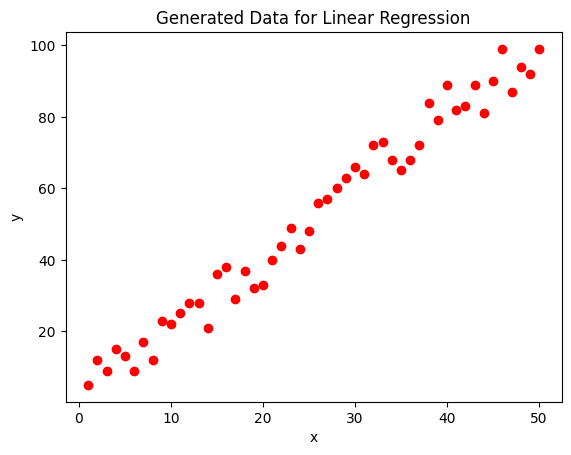

In [40]:
plt.scatter(X.numpy(),y.numpy(),color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

In [41]:
class Model(nn.Module):
    def __init__(self,in_features,out_features):
        super().__init__()
        self.linear=nn.Linear(in_features,out_features)

    def forward(self,x):
        y_pred=self.linear(x)
        return y_pred

In [42]:
model=Model(1,1)

In [43]:
model

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [44]:
print('Weight:',model.linear.weight.item())
print('Bias:',model.linear.bias.item())

Weight: -0.5688724517822266
Bias: -0.03454399108886719


In [45]:
loss_function=nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.0001)

In [46]:
epochs=100
losses=[]
for epoch in range(1,epochs+1):
  optimizer.zero_grad()
  y_pred=model(X)
  loss=loss_function(y_pred,y)
  losses.append(loss.item())
  loss.backward()
  optimizer.step()
  print(f"epoch: {epoch:2} loss: {loss.item():10.8f}"
         f"weight: {model.linear.weight.item():10.8f}"
         f"bias: {model.linear.bias.item():10.8f}")


epoch:  1 loss: 5759.10205078weight: -0.12501690bias: -0.02123583
epoch:  2 loss: 3956.68554688weight: 0.24256074bias: -0.01019400
epoch:  3 loss: 2720.53491211weight: 0.54696906bias: -0.00102902
epoch:  4 loss: 1872.74536133weight: 0.79906368bias: 0.00658164
epoch:  5 loss: 1291.30615234weight: 1.00783491bias: 0.01290510
epoch:  6 loss: 892.53741455weight: 1.18072784bias: 0.01816256
epoch:  7 loss: 619.05004883weight: 1.32390821bias: 0.02253722
epoch:  8 loss: 431.48419189weight: 1.44248223bias: 0.02618078
epoch:  9 loss: 302.84585571weight: 1.54067850bias: 0.02921888
epoch: 10 loss: 214.62176514weight: 1.62199903bias: 0.03175558
epoch: 11 loss: 154.11499023weight: 1.68934381bias: 0.03387703
epoch: 12 loss: 112.61765289weight: 1.74511468bias: 0.03565460
epoch: 13 loss: 84.15746307weight: 1.79130065bias: 0.03714738
epoch: 14 loss: 64.63855743weight: 1.82954884bias: 0.03840432
epoch: 15 loss: 51.25187683weight: 1.86122346bias: 0.03946594
epoch: 16 loss: 42.07082367weight: 1.88745415bias

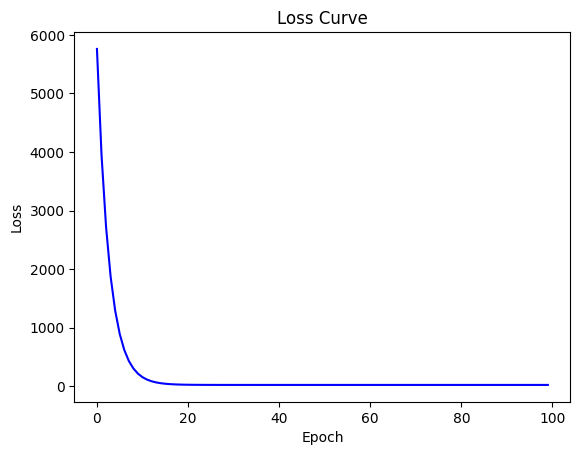

In [47]:
plt.plot(range(epochs),losses,color="Blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()


Name : Jeeva K
Register No : 212223230090

Final Weight : 2.01357603, Final Bias : 0.05421584


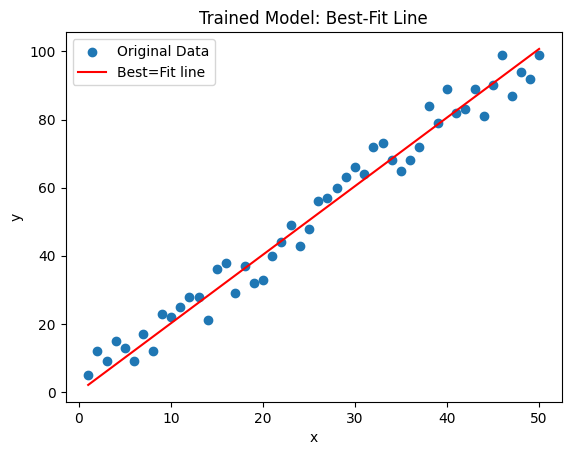


Prediction for x = 120 : 241.68333435


In [48]:
final_weight=model.linear.weight.item()
final_bias=model.linear.bias.item()
print("\nName : Jeeva K")
print("Register No : 212223230090")
print(f"\nFinal Weight : {final_weight:.8f}, Final Bias : {final_bias:.8f}")


x1=torch.tensor([X.min().item(),X.max().item()])
y1=x1*final_weight+final_bias


plt.scatter(X,y,label="Original Data")
plt.plot(x1,y1,'r',label="Best=Fit line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()

x_new=torch.tensor([[120.0]])
y_new_pred=model(x_new).item()

print(f"\nPrediction for x = 120 : {y_new_pred:.8f}")
